<a href="https://colab.research.google.com/github/jhuang2003/Seattle-Weather/blob/main/Copy_of_Seattle_NYC_Weather_Continued_With_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objectives

1. Learn the data science methodology using a project that does not involve advanced statistical methods.

2. Learn to use Python for data science.

3. Be able to ask questions about data and find answers.

In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"a": np.ones((100,))})

## Introduction

Provide a brief introduction to the purpose of this notebook.



```
# This is formatted as code
```

## Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

*italicized text*## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and New York (or other locations of interest) for the 3 year period January 2020 - January 2024.

I have already obtained the data. The data are available at this [github repository](https://github.com/galenegan/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `ny_rain.csv`.

Load the Seattle data set

In [3]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

Load the New York data set

In [4]:
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

## Explore the Contents of the Datasets

In [5]:
# Look at head of each dataframe
df_seattle.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,82.9,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
1,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,135.0,2020-01-01,NaN,NaN,0.23,NaN,NaN,NaN,NaN
2,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,48.2,2020-01-01,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,74.1,2020-01-01,NaN,NaN,0.13,NaN,NaN,NaN,NaN
4,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,112.5,2020-01-01,NaN,NaN,0.22,NaN,NaN,NaN,NaN


In [6]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [7]:
df_ny.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
1,US1NYWC0018,"ARMONK 0.3 SE, NY US",41.129960,-73.708161,117.3,2020-01-01,NaN,NaN,0.06,0.0,0.0,NaN,NaN
2,US1NYNS0034,"WANTAGH 0.3 ESE, NY US",40.666824,-73.505371,4.3,2020-01-01,NaN,NaN,0.00,0.0,0.0,NaN,NaN
3,USW00054787,"FARMINGDALE REPUBLIC AIRPORT, NY US",40.734430,-73.416370,22.8,2020-01-01,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1NYNS0042,"ALBERTSON 0.2 SSE, NY US",40.769131,-73.647484,43.3,2020-01-01,NaN,NaN,0.00,0.0,NaN,NaN,NaN


In [8]:
print(df_seattle.columns)
print(df_ny.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')
Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


## How can we programatically check that the columns are equivalent?

In [9]:
df_seattle.columns.unique() == df_seattle.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [10]:
set(df_seattle.columns) == set(df_ny.columns)

True

## What about types?

In [11]:
# Checking the types
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

## Do any data types need to be converted?

**Are there any variables that seem to be coded incorrectly? For example, are there any numerical variable encoded as strings?**

In [12]:
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])

In [13]:
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [14]:
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [15]:
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])

In [16]:
df_seattle.shape

(7003, 13)

In [17]:
df_ny.shape

(17465, 13)

In [18]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


In [19]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    17465 non-null  object        
 1   NAME       17465 non-null  object        
 2   LATITUDE   17465 non-null  float64       
 3   LONGITUDE  17465 non-null  float64       
 4   ELEVATION  17465 non-null  float64       
 5   DATE       17465 non-null  datetime64[ns]
 6   DAPR       155 non-null    float64       
 7   MDPR       151 non-null    float64       
 8   PRCP       17275 non-null  float64       
 9   SNOW       11508 non-null  float64       
 10  SNWD       6318 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 1.7+ MB


## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

**What can we do to check whether the data are suitable?**

<pre>






</pre>


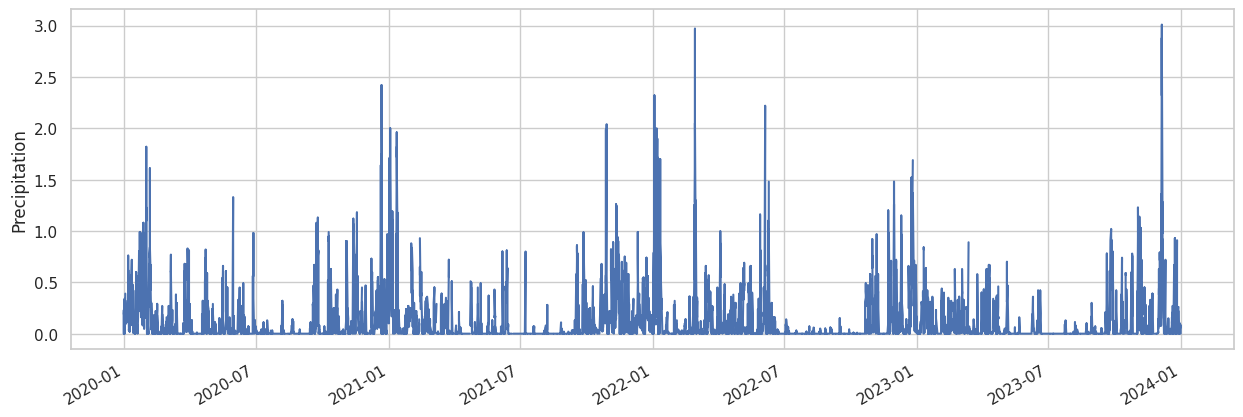

In [20]:
fig, ax = plt.subplots()
ax.plot(df_seattle["DATE"], df_seattle["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

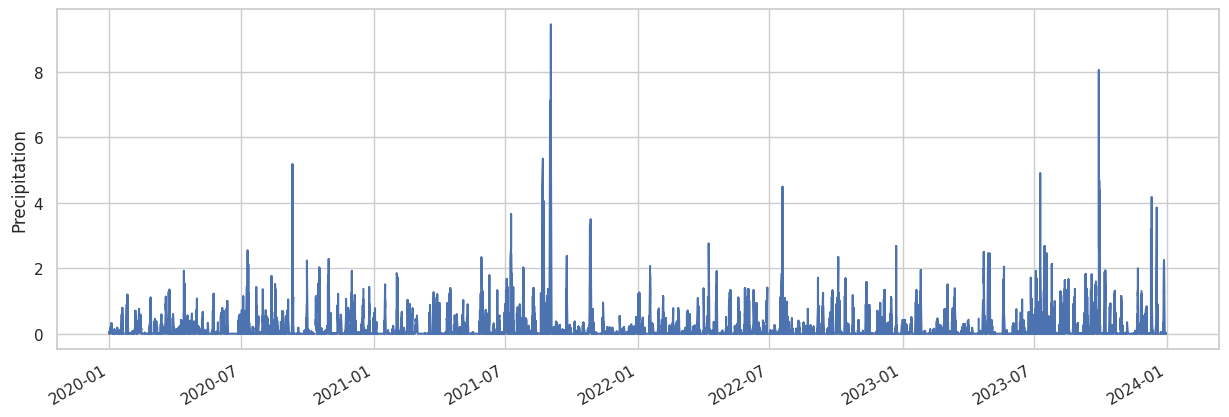

In [21]:
fig, ax = plt.subplots()
ax.plot(df_ny["DATE"], df_ny["PRCP"])
ax.set_ylabel("Precipitation")
fig.autofmt_xdate()
fig.set_size_inches(15, 5)

## Select relevant subsets of the data

**Is there anything that we should remove from the data sets that is unnecessary?**

<pre>



















</pre>

In [22]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   ELEVATION  7003 non-null   float64       
 5   DATE       7003 non-null   datetime64[ns]
 6   DAPR       143 non-null    float64       
 7   MDPR       143 non-null    float64       
 8   PRCP       6718 non-null   float64       
 9   SNOW       3006 non-null   float64       
 10  SNWD       1331 non-null   float64       
 11  DASF       0 non-null      float64       
 12  MDSF       0 non-null      float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 711.4+ KB


In [23]:
bad_cols = ["ELEVATION", "DAPR", "MDPR", "SNOW", "SNWD", "DASF", "MDSF"]
df_seattle = df_seattle.drop(columns=bad_cols)
df_ny = df_ny.drop(columns=bad_cols)

In [24]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7003 entries, 0 to 7002
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   STATION    7003 non-null   object        
 1   NAME       7003 non-null   object        
 2   LATITUDE   7003 non-null   float64       
 3   LONGITUDE  7003 non-null   float64       
 4   DATE       7003 non-null   datetime64[ns]
 5   PRCP       6718 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 328.4+ KB


## How can we deal with the station number mismatch?
A couple options we'll explore:
- Pick one station from each city
- Random sample from each city
- Average across all stations in each city

In [25]:
# Doing an average first:
df_seattle_avg = df_seattle.groupby(by="DATE", as_index=False)["PRCP"].mean()
df_ny_avg = df_ny.groupby(by="DATE", as_index=False)["PRCP"].mean()

In [26]:
df_seattle_avg.head(20)

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571
5,2020-01-06,0.233333
6,2020-01-07,0.511111
7,2020-01-08,0.042500
8,2020-01-09,0.060000
9,2020-01-10,0.167778


In [27]:
# Making sure that they are the same length
print(len(df_ny_avg) == len(df_seattle_avg))

True


## By the way, how much data should there be?

Over 4 years there should be

$$4 \times 365 + 1 = 1461$$

days.

In [28]:
print(len(df_ny_avg))

1461


## What about random sampling?

Note that this will produce a potentially gappy time series, so the types of analyses you can do with it will be more limited

In [29]:
# First define some number of points you want in each resulting dataframe. An average of one per day seems reasonable
N_keep = 1461
df_seattle_subsample = df_seattle.sample(N_keep)

In [30]:
df_seattle_subsample.head(10)

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
4716,US1WAKG0200,"SEATTLE 5.8 SSE, WA US",47.543999,-122.303810,2022-06-09,0.04
1652,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,2020-09-16,0.00
5530,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,2022-12-01,0.07
741,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,2020-04-12,0.00
1102,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-06-05,0.00
912,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,2020-05-05,0.00
115,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-14,0.11
404,US1WAKG0229,"SEATTLE 5.5 NNE, WA US",47.696532,-122.312907,2020-02-22,0.00
988,US1WAKG0229,"SEATTLE 5.5 NNE, WA US",47.696532,-122.312907,2020-05-16,0.03
5926,US1WAKG0192,"SEATTLE 5.6 N, WA US",47.702387,-122.351663,2023-03-12,0.00


In [31]:
# Probably want to sort it by time
df_seattle_subsample = df_seattle_subsample.sort_values(by="DATE")

In [32]:
df_seattle_subsample.head(20)

,STATION,NAME,LATITUDE,LONGITUDE,DATE,PRCP
10,US1WAKG0200,"SEATTLE 5.8 SSE, WA US",47.543999,-122.303810,2020-01-01,0.19
6,US1WAKG0199,"SEATTLE 4.5 N, WA US",47.686424,-122.362209,2020-01-01,0.19
3,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-01,0.13
17,US1WAKG0255,"SEATTLE 6.5 SSW, WA US",47.530849,-122.382541,2020-01-02,0.00
36,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.444670,-122.314420,2020-01-04,0.10
34,US1WAKG0243,"SEATTLE 3.9 SSW, WA US",47.567666,-122.372386,2020-01-04,0.14
49,US1WAKG0229,"SEATTLE 5.5 NNE, WA US",47.696532,-122.312907,2020-01-06,0.16
62,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",47.611700,-122.308500,2020-01-08,0.05
72,US1WAKG0200,"SEATTLE 5.8 SSE, WA US",47.543999,-122.303810,2020-01-09,0.09
74,US1WAKG0145,"SEATTLE 4.2 N, WA US",47.681873,-122.365539,2020-01-09,0.02


## And now picking a single station

In [33]:
df_seattle["NAME"].unique()

array(['SEATTLE 4.5 N, WA US', 'SEATTLE 6.5 SSW, WA US',
       'SEATTLE 3.9 SSW, WA US', 'SEATTLE 4.2 N, WA US',
       'SEATTLE 5.6 N, WA US', 'SEATTLE 2.1 ESE, WA US',
       'SEATTLE TACOMA AIRPORT, WA US', 'SEATTLE 5.8 SSE, WA US',
       'SEATTLE 5.5 NNE, WA US', 'SEATTLE 2.5 SE, WA US'], dtype=object)

In [34]:
df_ny["NAME"].unique()

array(['NY CITY CENTRAL PARK, NY US', 'ARMONK 0.3 SE, NY US',
       'WANTAGH 0.3 ESE, NY US', 'FARMINGDALE REPUBLIC AIRPORT, NY US',
       'ALBERTSON 0.2 SSE, NY US', 'JFK INTERNATIONAL AIRPORT, NY US',
       'AMITYVILLE 0.1 WSW, NY US', 'FLORAL PARK 0.4 W, NY US',
       'CENTERPORT 0.9 SW, NY US', 'BRIARCLIFF MANOR 1.3 NE, NY US',
       'QUEENS 4.7 SW, NY US', 'THORNWOOD 0.7 NW, NY US',
       'STATEN ISLAND 2.6 N, NY US',
       'MATTHEWS PALMER PLAYGROUND NEW YORK 6.8 NNW, NY US',
       'NEW HEMPSTEAD 0.6 SE, NY US', 'LITTLE NECK 0.3 SE, NY US',
       'ALBERTSON 0.5 SW, NY US', 'SPRING VALLEY 1.7 SSW, NY US',
       'LINDENHURST 1.0 NE, NY US', 'EAST ROCKAWAY 0.5 S, NY US'],
      dtype=object)

In [35]:
df_seattle["NAME"] == "SEATTLE TACOMA AIRPORT, WA US"

0       False
1       False
2       False
3       False
4       False
        ...  
6998     True
6999    False
7000    False
7001    False
7002     True
Name: NAME, Length: 7003, dtype: bool

In [36]:
df_seatac = df_seattle.loc[df_seattle["NAME"] == "SEATTLE TACOMA AIRPORT, WA US"]
df_jfk = df_ny.loc[df_ny["NAME"] == "JFK INTERNATIONAL AIRPORT, NY US"]

In [37]:
print(df_seatac.shape)
print(df_jfk.shape)

(1366, 6)
(1462, 6)


Maybe this isn't such a good idea! Looks like the Seattle dataset is missing some days, and the JFK dataset has one extra day. We also know from earlier that there are some NaNs in the dataset, which we can visualize using the `missingno` package



<Axes: >

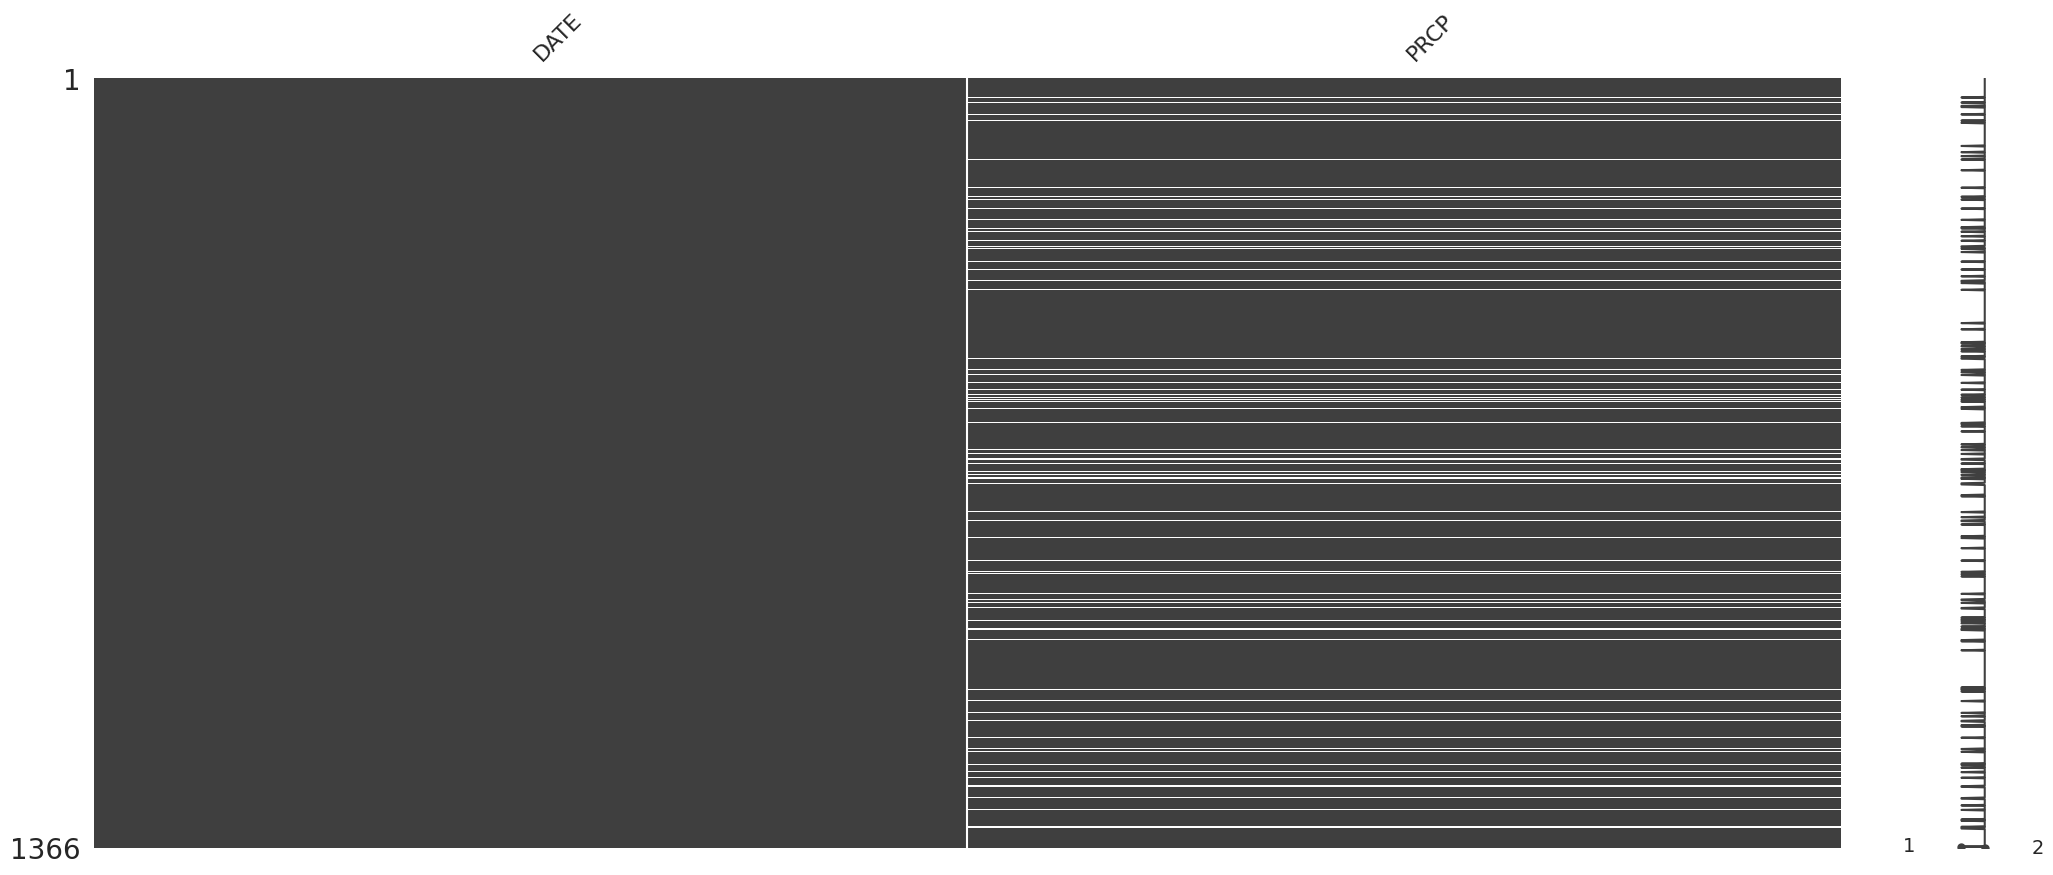

In [38]:
msno.matrix(df_seatac[['DATE','PRCP']])


This is helpful, but we should note that this does not indicate where there are dates that are not present in the data set. We will return to this issue after joining the data sets because this will show the dates that are missing from the Seattle data set.

## Tutorial on joins

In [39]:
df1 = pd.DataFrame({'day':[1, 2, 3, 4, 5], 'prcp':[0.1, 0.2, 0.3, 0.4, 0.5 ]})
df1

,day,prcp
0,1,0.1
1,2,0.2
2,3,0.3
3,4,0.4
4,5,0.5


In [40]:
df2 = pd.DataFrame({'day':[1, 3, 5, 7], 'prcp':[1.1, 1.3, 1.5, 1.7]})
df2

,day,prcp
0,1,1.1
1,3,1.3
2,5,1.5
3,7,1.7


Join using the keys from only one DataFrame (the left one).

In [41]:
df1.merge(df2, on = 'day', how = 'left')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


In [42]:
df2.merge(df1, on = 'day', how = 'left')

,day,prcp_x,prcp_y
0,1,1.1,0.1
1,3,1.3,0.3
2,5,1.5,0.5
3,7,1.7,NaN


Join using the keys from both DataFrames.

In [43]:
df1.merge(df2, on = 'day', how = 'outer')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5
5,7,NaN,1.7


Join using the keys that are common to the DataFrames.

In [44]:
df1.merge(df2, on = 'day', how = 'inner')

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,3,0.3,1.3
2,5,0.5,1.5


## Join data frames keeping `DATE` and `PRCP` columns

**What type of join should we do?**

In [45]:
df_jfk = df_jfk.drop_duplicates(subset="DATE")
df_seatac = df_seatac.drop_duplicates(subset="DATE")

In [46]:
df_jfk.shape

(1461, 6)

In [47]:
df = df_jfk.merge(df_seatac, on="DATE", how="left")

In [48]:
df.tail()

,STATION_x,NAME_x,LATITUDE_x,LONGITUDE_x,DATE,PRCP_x,STATION_y,NAME_y,LATITUDE_y,LONGITUDE_y,PRCP_y
1456,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2023-12-27,0.19,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.1
1457,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2023-12-28,1.55,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,NaN
1458,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2023-12-29,0.02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.0
1459,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2023-12-30,0.00,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.1
1460,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.63915,-73.7639,2023-12-31,0.00,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",47.44467,-122.31442,0.0


<pre>



















</pre>

JFK has data for all dates, so do a left join with JFK as the left data set. But first let's drop any pesky duplicate dates

In [49]:
df_jfk = df_jfk.drop_duplicates(subset="DATE")
df_seatac = df_seatac.drop_duplicates(subset="DATE")
df = df_jfk[['DATE', 'PRCP']].merge(df_seatac[['DATE', 'PRCP']], on='DATE', how='left')

In [50]:
df.shape

(1461, 3)

Each DataFrame had a column named `PRCP`, so the default is to add suffixes _x and _y to differentiate the columns. Normally, I would rename the columns at this point to something more informative. However, I know that I want to convert the DataFrame to a tidy format and I will modify the names later.

## Tutorial on tidy data

In [51]:
df_join = df1.merge(df2, on = 'day', how = 'left')

df_join

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


Precipitation values are distributed across 2 columns, one for each city. A tidy data set has one column for each variable.

**What would a tidy (or long) version of this data set look like?**

<pre>



















</pre>

In [52]:
df_join

,day,prcp_x,prcp_y
0,1,0.1,1.1
1,2,0.2,NaN
2,3,0.3,1.3
3,4,0.4,NaN
4,5,0.5,1.5


In [53]:
df_tidy = pd.melt(df_join, id_vars = 'day', var_name = 'CITY', value_name = 'PRCP')

df_tidy

,day,CITY,PRCP
0,1,prcp_x,0.1
1,2,prcp_x,0.2
2,3,prcp_x,0.3
3,4,prcp_x,0.4
4,5,prcp_x,0.5
5,1,prcp_y,1.1
6,2,prcp_y,NaN
7,3,prcp_y,1.3
8,4,prcp_y,NaN
9,5,prcp_y,1.5


Rename the city values

In [54]:
df_tidy.loc[df_tidy['CITY'] == 'prcp_x','CITY'] = 'city 1'

df_tidy.loc[df_tidy['CITY'] == 'prcp_y','CITY'] = 'city 2'

In [55]:
df_tidy

,day,CITY,PRCP
0,1,city 1,0.1
1,2,city 1,0.2
2,3,city 1,0.3
3,4,city 1,0.4
4,5,city 1,0.5
5,1,city 2,1.1
6,2,city 2,NaN
7,3,city 2,1.3
8,4,city 2,NaN
9,5,city 2,1.5


## Create a tidy data frame with columns for city and precipitation

<pre>



















</pre>

In [56]:
df_tidy = pd.melt(df, id_vars="DATE", value_vars="PRCP", var_name="city")

In [57]:
df_tidy

,DATE,city,value
0,2020-01-01,PRCP_y,0.00
1,2020-01-02,PRCP_y,0.21
2,2020-01-03,PRCP_y,0.39
3,2020-01-04,PRCP_y,0.10
4,2020-01-05,PRCP_y,0.14
...,...,...,...
1456,2023-12-27,PRCP_y,0.10
1457,2023-12-28,PRCP_y,NaN
1458,2023-12-29,PRCP_y,0.00
1459,2023-12-30,PRCP_y,0.10


In [58]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'CITY', value_name = 'PRCP')

How did this change the DataFrame?

In [59]:
df.head()

,DATE,CITY,PRCP
0,2020-01-01,PRCP_x,0.00
1,2020-01-02,PRCP_x,0.00
2,2020-01-03,PRCP_x,0.13
3,2020-01-04,PRCP_x,0.16
4,2020-01-05,PRCP_x,0.00


### Rename columns or values to follow best practices

Rename the city values 'NYC' and 'SEA'

In [60]:
df.loc[df['CITY']=='PRCP_x', 'CITY'] = 'NYC'

In [61]:
df.loc[df['CITY']=='PRCP_y', 'CITY'] = 'SEA'

In [62]:
df.head()

,DATE,CITY,PRCP
0,2020-01-01,NYC,0.00
1,2020-01-02,NYC,0.00
2,2020-01-03,NYC,0.13
3,2020-01-04,NYC,0.16
4,2020-01-05,NYC,0.00


In [63]:
df.tail()

,DATE,CITY,PRCP
2917,2023-12-27,SEA,0.1
2918,2023-12-28,SEA,NaN
2919,2023-12-29,SEA,0.0
2920,2023-12-30,SEA,0.1
2921,2023-12-31,SEA,0.0


Rename the columns to be lowercase and more easily understood using `df.rename()`

In [64]:
mapping_dict = {'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'}

In [65]:
df = df.rename(columns=mapping_dict)

[rename documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)

## Deal with missing values

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2690 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ KB


<Axes: >

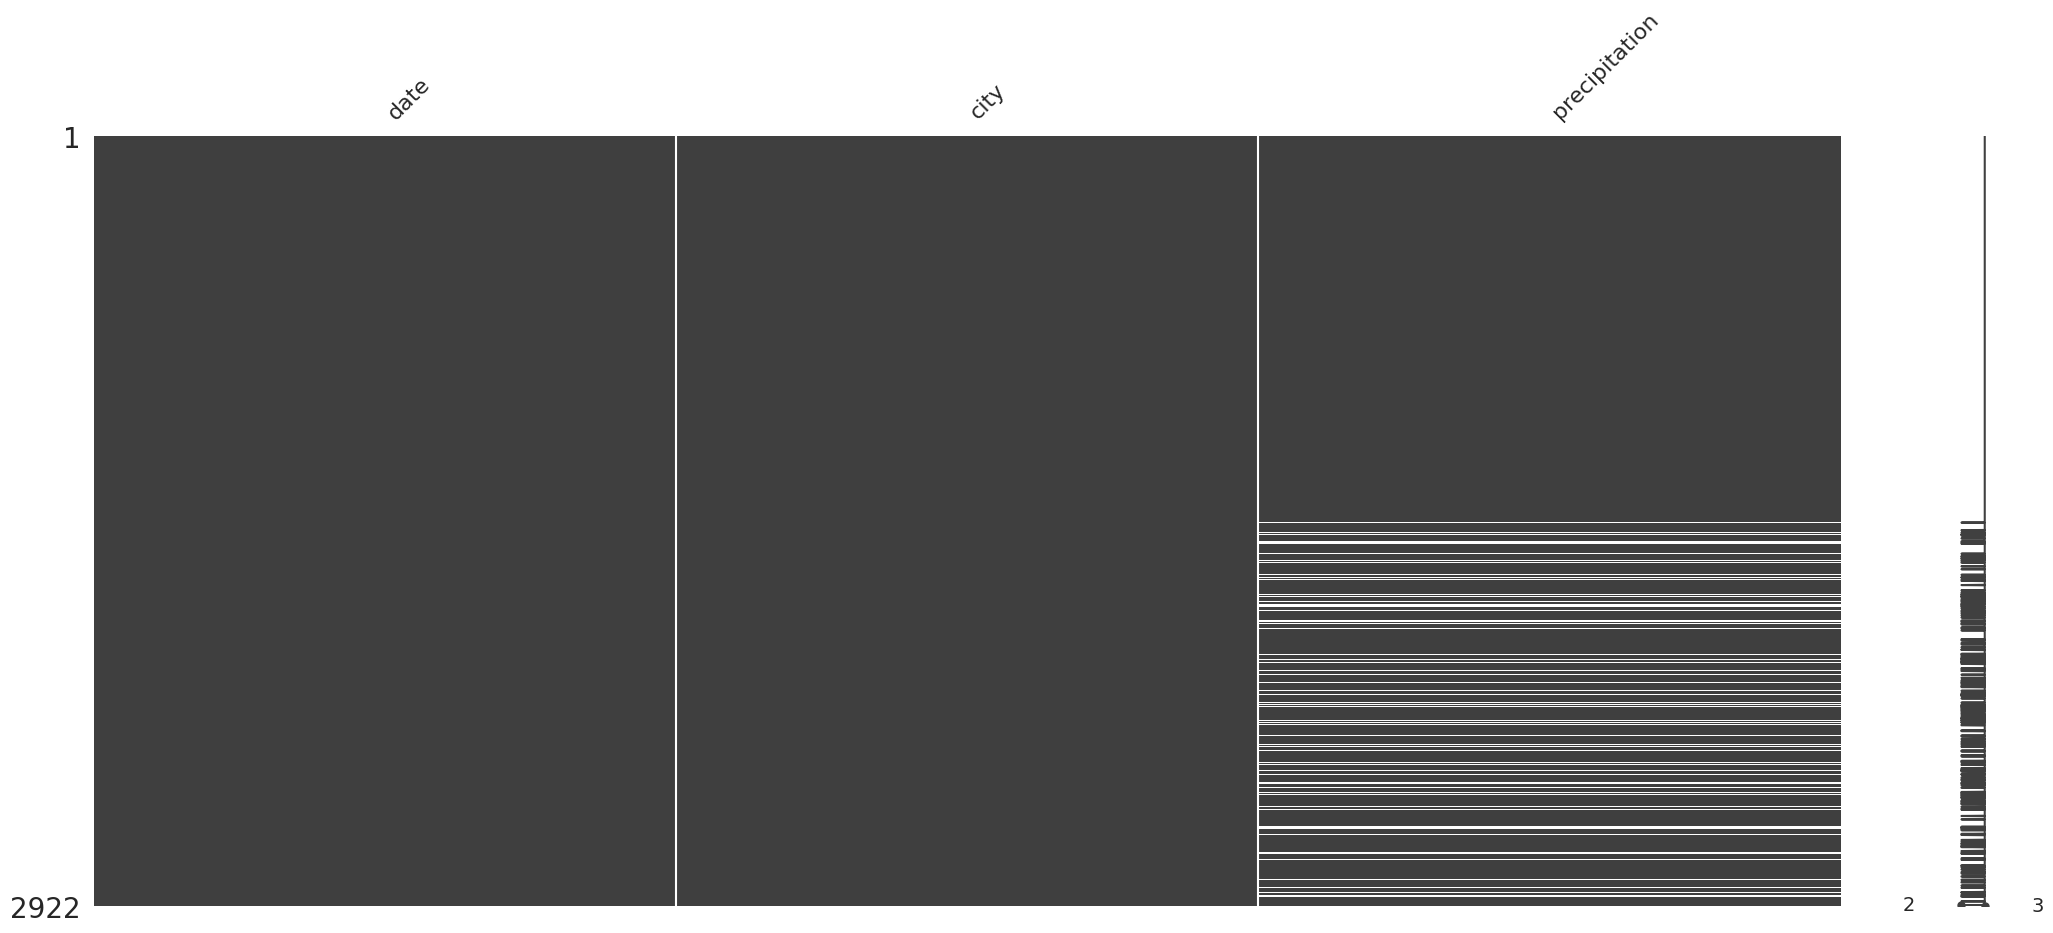

In [67]:
msno.matrix(df)

When we joined the DataFrames using a left join in the New York data set, which is not missing any days, the missing days were created for the Seattle data set. We can see this block of missing values starting at the second half of the precipitation column.

## Impute missing values
How do we want to fill the NaNs?

In [68]:
# Linear interpolation is probably the simplest approach
df["precip_interp_1"] = df["precipitation"].interpolate()

In [69]:
df["precip_interp_1"].isna().sum()

0

In [70]:
df["precipitation"].isna().sum()

232

In [71]:
# Could try something fancier, like taking the average value on equivalent day-of-year from other years
df["precip_interp_2"] = df["precipitation"]
df_sea = df.loc[df["city"] == "SEA"]
df_sea["day_of_year"] = df_sea["date"].dt.dayofyear
nan_idx = pd.isna(df_sea["precipitation"])
df_mean_daily = df_sea.groupby("day_of_year")["precipitation"].mean()


<ipython-input-71-f1eea4e2c1ba>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sea["day_of_year"] = df_sea["date"].dt.dayofyear


In [72]:
df_mean_daily.head()

day_of_year
1    0.107500
2    0.677500
3    0.330000
4    0.182500
5    0.266667
Name: precipitation, dtype: float64

In [73]:
nan_idx

1461    False
1462    False
1463    False
1464    False
1465    False
        ...  
2917    False
2918     True
2919    False
2920    False
2921    False
Name: precipitation, Length: 1461, dtype: bool

In [74]:
df_sea.loc[nan_idx, "precip_interp_2"] = df_mean_daily.loc[df_sea.loc[nan_idx, "day_of_year"].values].values

In [75]:
df_sea["precip_interp_2"].isna().sum()

1

In [76]:
df.loc[df_sea.index] = df_sea

In [77]:
df.tail()

,date,city,precipitation,precip_interp_1,precip_interp_2
2917,2023-12-27,SEA,0.1,0.10,0.10
2918,2023-12-28,SEA,NaN,0.05,0.08
2919,2023-12-29,SEA,0.0,0.00,0.00
2920,2023-12-30,SEA,0.1,0.10,0.10
2921,2023-12-31,SEA,0.0,0.00,0.00


In [78]:
# Let's just use the simple linear for now
df["precipitation"] = df["precip_interp_1"]
df = df.drop(columns=["precip_interp_1", "precip_interp_2"])


In [79]:
# And add the month and year
df['month'] = pd.DatetimeIndex(df['date']).month
df["year"] = df["date"].dt.year

## Export the clean .csv file

In [80]:
# df.to_csv('clean_seattle_nyc_weather.csv', index=False)

## Numerical summaries

In [81]:
df.head()

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.00,1,2020
1,2020-01-02,NYC,0.00,1,2020
2,2020-01-03,NYC,0.13,1,2020
3,2020-01-04,NYC,0.16,1,2020
4,2020-01-05,NYC,0.00,1,2020


In [82]:
df.tail()

,date,city,precipitation,month,year
2917,2023-12-27,SEA,0.10,12,2023
2918,2023-12-28,SEA,0.05,12,2023
2919,2023-12-29,SEA,0.00,12,2023
2920,2023-12-30,SEA,0.10,12,2023
2921,2023-12-31,SEA,0.00,12,2023


In [83]:
df.describe()

,date,precipitation,month,year
count,2922,2922.000000,2922.000000,2922.000000
mean,2021-12-31 00:00:00,0.112064,6.522930,2021.498973
min,2020-01-01 00:00:00,0.000000,1.000000,2020.000000
25%,2020-12-31 00:00:00,0.000000,4.000000,2020.000000
50%,2021-12-31 00:00:00,0.000000,7.000000,2021.000000
75%,2022-12-31 00:00:00,0.080000,10.000000,2022.000000
max,2023-12-31 00:00:00,8.050000,12.000000,2023.000000
std,NaN,0.304695,3.449293,1.118531


In [84]:
df['precipitation'].max()

8.05

In [85]:
df['precipitation'].min()

0.0

In [86]:
df.groupby(by='city').describe()

date                                                                 \
     count                 mean                  min                  25%   
city                                                                        
NYC   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   
SEA   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   

                                                                          \
                      50%                  75%                  max  std   
city                                                                       
NYC   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   
SEA   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   

     precipitation            ... month              year               \
             count      mean  ...   max       std   count         mean   
city                          ...                                        
NYC         1461.0  0.118207  ...  12.0  3.449884  1461.0  2021.498973   
SEA         1461.0  0.105921  ...  12.0  3.449884  1461.0  2021.498973   

                                                        
         min     25%     50%     75%     max       std  
city                                                    
NYC   2020.0  2020.0  2021.0  2022.0  2023.0  1.118723  
SEA   2020.0  2020.0  2021.0  2022.0  2023.0  1.118723  

[2 rows x 32 columns]

What else might you be interested in? How do you experience rain?

## Plots

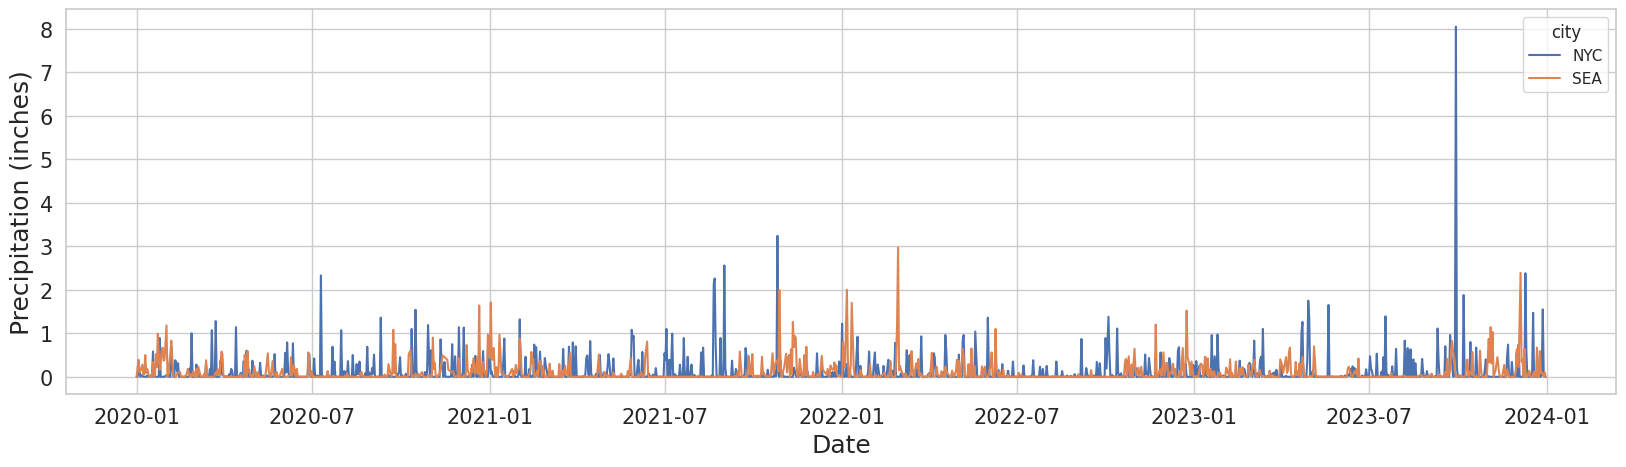

In [87]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='date', y='precipitation', hue='city')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

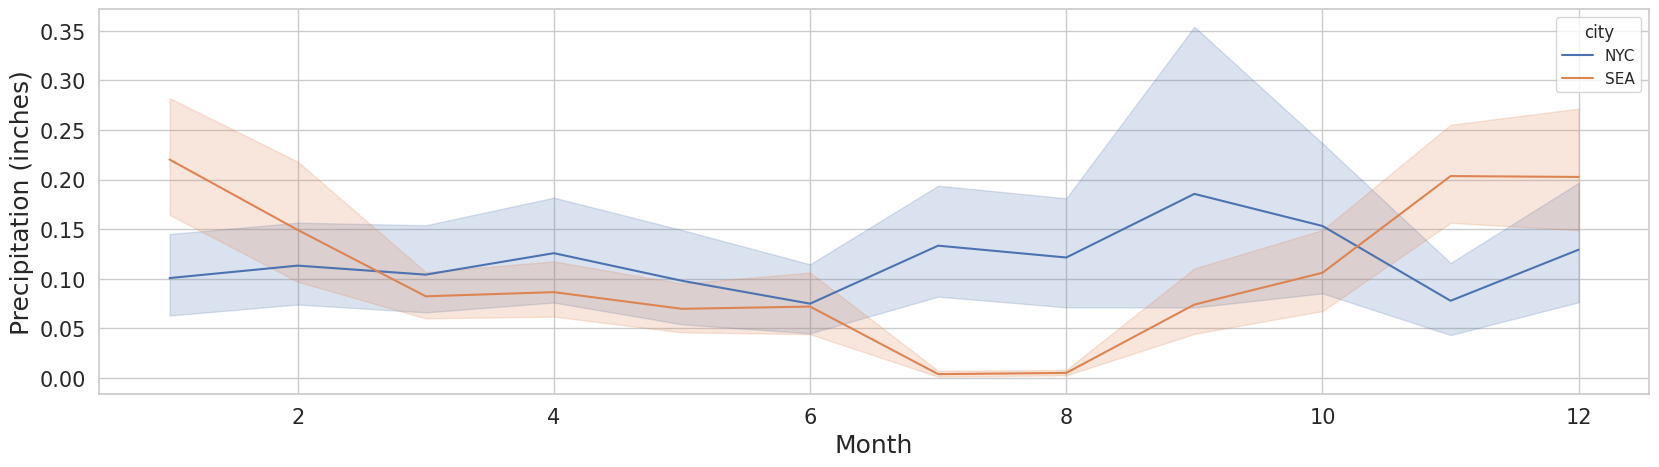

In [88]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

Plot of Average by month

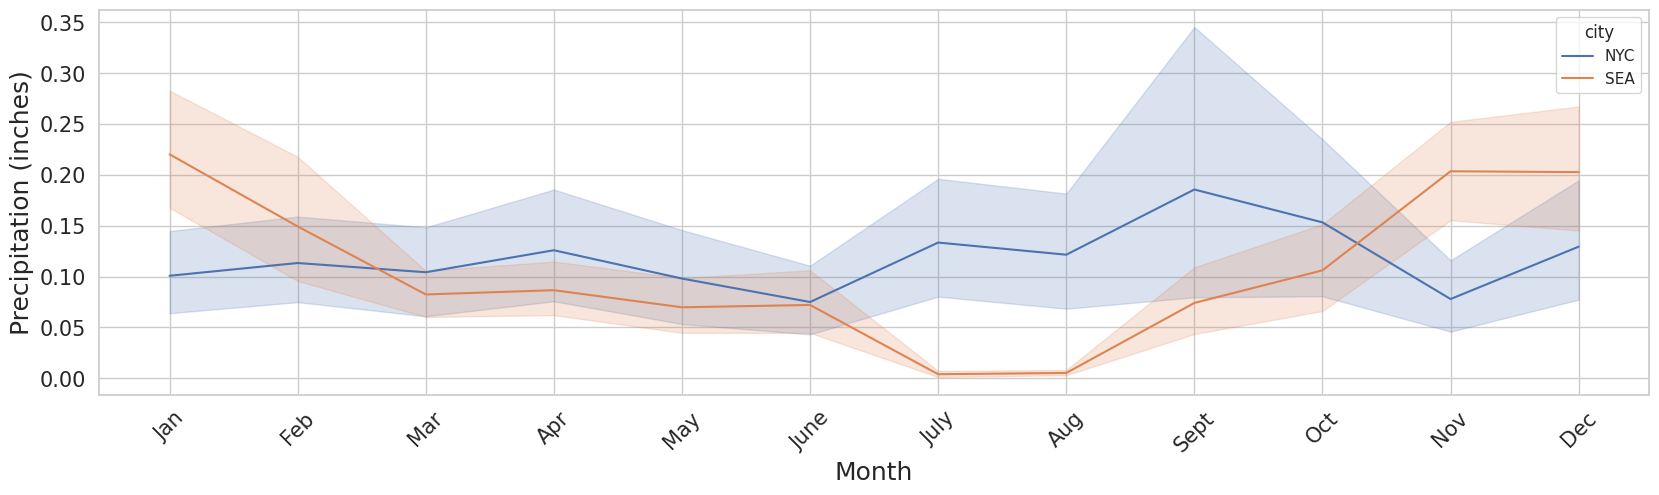

In [89]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='month', y='precipitation', hue='city')

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tick_params(labelsize=15);

Average by year plot

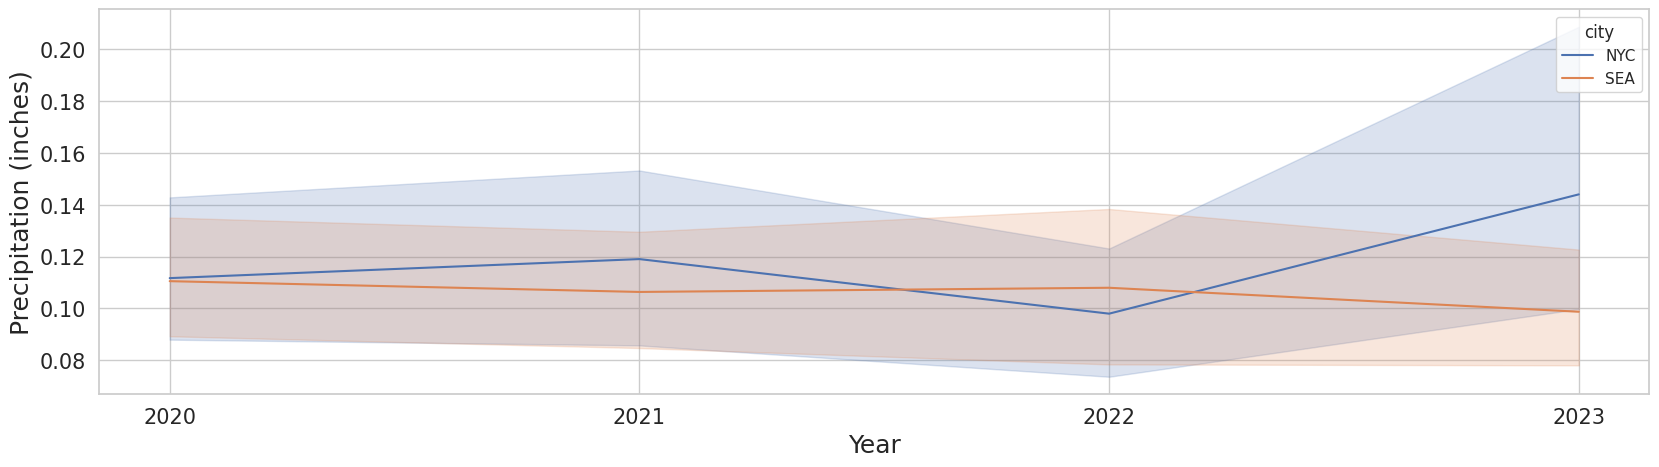

In [90]:
plt.figure(figsize=(20,5))

sns.lineplot(data=df, x='year', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Year', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.xticks(list(range(2020, 2024)))

plt.tick_params(labelsize=15);

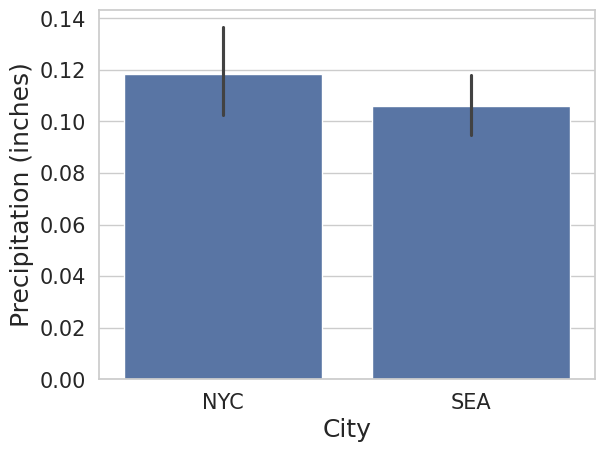

In [91]:
sns.barplot(data=df, x='city', y='precipitation')

plt.xlabel('City', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)

plt.tick_params(labelsize=15);

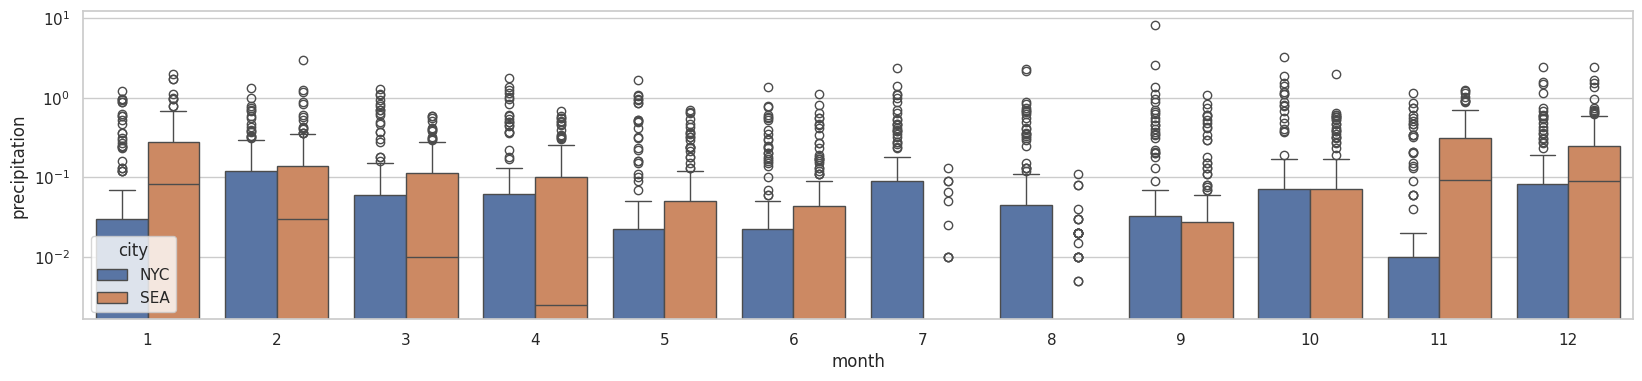

In [96]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city');
plt.yscale('log') #added in class, try without too

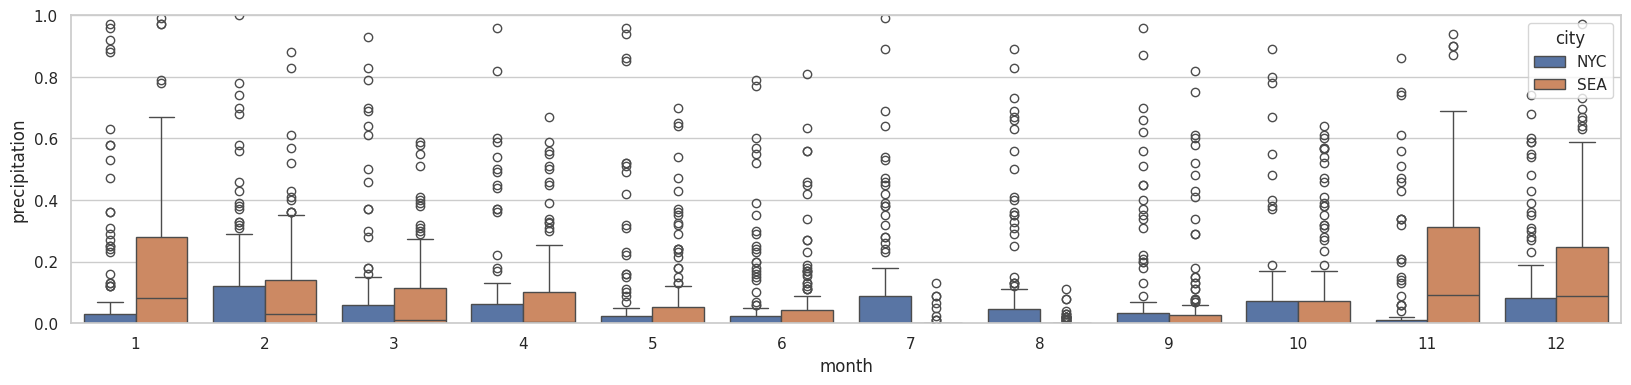

In [93]:
plt.figure(figsize=(20,4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue='city')

# Cutting out some of the outliers
plt.ylim(0,1);

This distribution is right skewed, not well scaled so turned to log scale next

<Axes: xlabel='precipitation', ylabel='Count'>

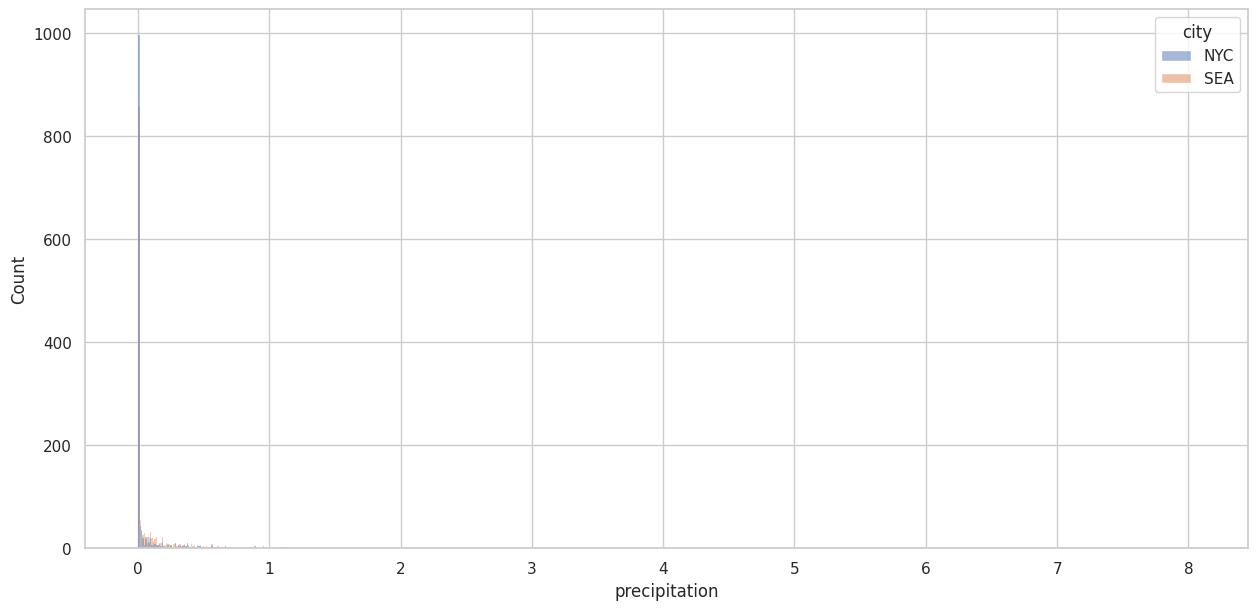

In [98]:
# And my favorite type of plot -- A histogram
plt.figure(figsize=(15, 7))
sns.histplot(data=df, x="precipitation", hue="city", bins="auto")
#plt.xlim(0,1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'log(rain)')

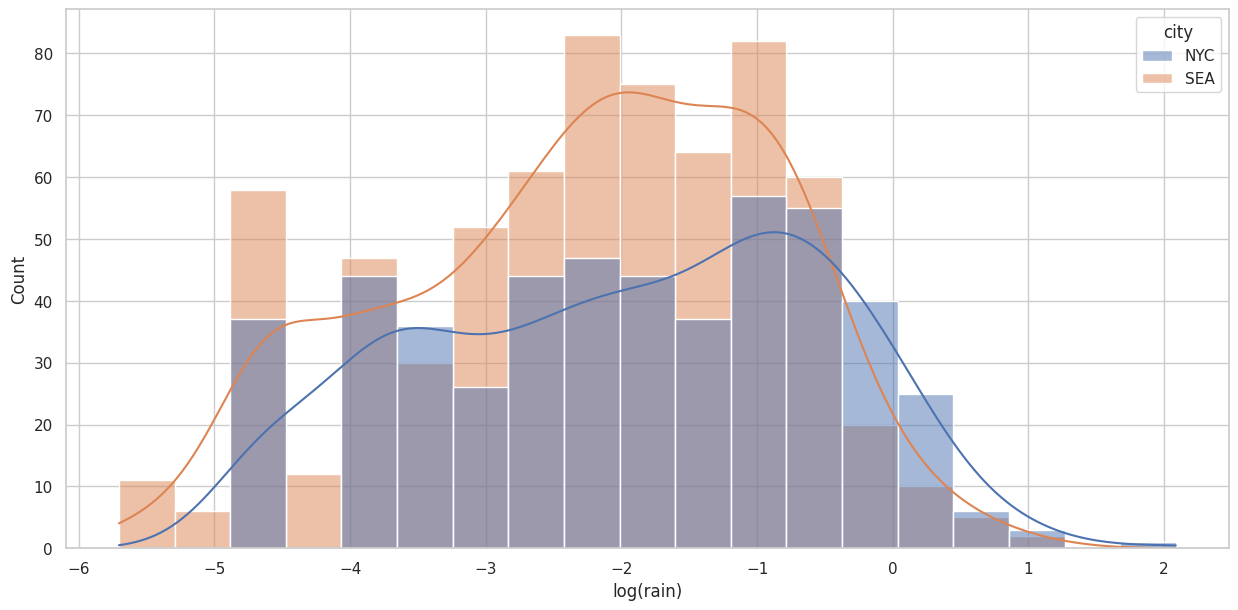

In [95]:
# Looks terrible, let's try log-transforming the data
df["log_precip"] = np.log(df["precipitation"])
plt.figure(figsize=(15, 7))
h = sns.histplot(data=df, x="log_precip", hue="city", bins="auto", kde=True)
plt.xlabel("log(rain)")